In [1]:
import sklearn
sklearn.__version__

'1.8.0'

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
features=pd.read_csv("../data/flight_features.csv")
features.head()

,Loyalty,Recency,Frequency,Monetary,Discount
0,2706,1,70,73564.66,0.961639
1,2597,7,70,73564.66,1.252314
2,2615,11,70,73564.66,1.254676
3,2047,97,23,73564.66,1.090870
4,1816,5,70,73564.66,0.970658


In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [10]:
# Take a random sample for silhouette score (performance-safe)
sample = scaled_features[
    np.random.choice(len(scaled_features), 10000, replace=False)
]

sil_scores = {}

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(sample)
    sil_scores[k] = silhouette_score(sample, labels)

sil_scores

{2: 0.39714233889608724,
 3: 0.276337979129596,
 4: 0.2797305856389699,
 5: 0.277669140392073,
 6: 0.27988219298439404,
 7: 0.2557309348347083,
 8: 0.24560564840608395,
 9: 0.2295593951508843,
 10: 0.22475022294705185}

In [7]:
inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)


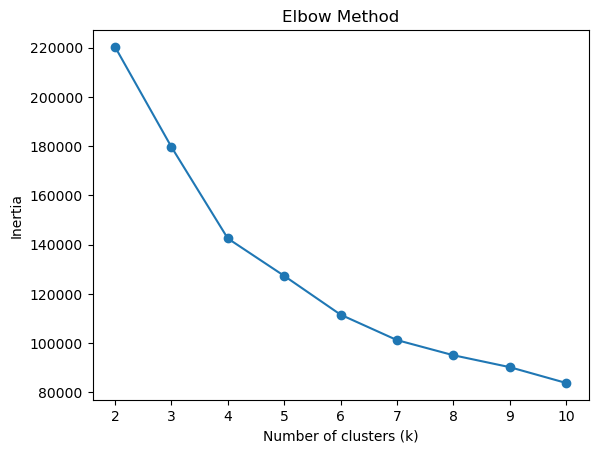

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(2, 11), inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [9]:
sil_scores = {}

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_features)
    sil_scores[k] = silhouette_score(scaled_features, labels)

sil_scores


KeyboardInterrupt: 

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [12]:
features["Cluster"] = clusters
features["Cluster"].value_counts()

Cluster
3    15983
1    15279
0    14074
4    11217
2     5491
Name: count, dtype: int64

In [13]:
features.to_csv("../data/flight_clustered.csv",index=False)